# Bibliotecas necesarias

In [16]:
from scripts.Triples2Sentence import Triples2Sentence
from scripts.TriplesClustering import TriplesClustering

import scripts.Model as Model
import pandas as pd

# Generador de datos

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json

class TriplesGenerator:

    
    def __init__(self, path = None):
        if(path==None):
            self.data_df = self.__generateData()
        else:
            self.data_df = self.__loadFile(path)
         

    #GETTERS
    def getData(self):
        return self.data_df


    def getTriples(self):
        return self.triples


    #OTHER METHODS
    def saveFile(self, path = "data/example.json"):
        with open(path, 'w', encoding='utf-8') as f:
            json.dump(self.to_json(), f, ensure_ascii=False, indent=4)


        
    def genDataFrame(self, data : list):

        #Extract info from datalist
        source = [d['data'][0] for d in data]
        target = [d['data'][2] for d in data]
        relation = [d['data'][1] for d in data]
        stage = [d['tags']['stage'] for d in data]
        themes = [d['tags']['themes'] for d in data]


        # create dataframe from lists
        data_df = pd.DataFrame({'source':source, 'relation':relation, 'target':target, 'stage':stage, 'themes':themes})

        # create a directed-graph from a dataframe
        #graph = nx.from_pandas_edgelist(graph_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

        #graph.show()
        return data_df


    def to_json(self):
        buf = self.data_df.to_json(orient="records")
        return json.loads(buf)


    #PRIVATE METHODS
    def __loadFile(self, path):
        return pd.read_json(path)
        
    def __generateData(self): 
        data = self.__genData()
        return self.genDataFrame(data)

    def __genData(self):
        data = []
        #tags => 
        #basic, family, parents, friends, school, studies, love, university, work, marriage, children, living place,
        #     hobbies,  feelings

        #stages of life => early childhood (18 months to 6 years), late childhood (6 years to 13 years),
        #     adolescence (13 years to 20 years), early adulthood (20 years to 30 years),
        #     middle adulthood (30 years to 65 years), late adulthood (+64 years)

        
        data = []

        #data.append(self.__dataConstructor("Elisa", "full name", "Elisa_Ruiz", "timeless",['basic']))
        data.append(self.__dataConstructor("Elisa", "birth place","Lugo, Galicia", "timeless",['basic']))
        data.append(self.__dataConstructor("Elisa", "birth date","18-05-1937", "timeless",['basic']))
        data.append(self.__dataConstructor("Elisa", "years old","82", "timeless",['basic']))
        data.append(self.__dataConstructor("Elisa", "father's name", "Juan", "timeless", ["basic"]))
        data.append(self.__dataConstructor("Elisa", "mother's name","Eva", "timeless", ["basic"]))

        #family parents
        data.append(self.__dataConstructor("Juan", "occupation", "labrador", "timeless", ["family","parents"]))
        data.append(self.__dataConstructor("Juan", "wife", "Eva", "timeless", ["family","parents"]))
        data.append(self.__dataConstructor("Juan", "birth place", "Santander", "timeless", ["family","parents"]))
        data.append(self.__dataConstructor("Juan", "birth date", "25-11-1911", "timeless", ["family","parents"]))
        data.append(self.__dataConstructor("Eva", "birth place", "Barcelona", "timeless", ["family","parents"]))
        data.append(self.__dataConstructor("Eva", "birth date", "12-01-1912", "timeless", ["family","parents"]))
        data.append(self.__dataConstructor("Eva", "occupation", "seamstress", "timeless", ["family","parents"]))
        
        #family siblings
        data.append(self.__dataConstructor("Elisa", "wealthy", "family", "timeless", ["family","siblings"]))
        data.append(self.__dataConstructor("Elisa", "large", "family", "timeless", ["family","siblings"]))
        data.append(self.__dataConstructor("Elisa", "number of sisters", "2", "timeless", ["family","siblings"]))
        data.append(self.__dataConstructor("Elisa", "number of brothers", "6", "timeless", ["family","siblings"]))  
        data.append(self.__dataConstructor("Elisa", "is", "youngest of family", "timeless", ["family","siblings"])) 

        #late childhood
        data.append(self.__dataConstructor("Elisa", "educated at", "La Salle's school", "late chilhood", ["school"]))        
        data.append(self.__dataConstructor("La Salle's school", "was", "all-girl catholic", "late chilhood", ["school"]))
        data.append(self.__dataConstructor("Elisa", "favorite school subjects", "history", "late chilhood", ["school"]))
        data.append(self.__dataConstructor("Elisa", "favorite school subjects", "drawing", "late chilhood", ["school"]))

        
        data.append(self.__dataConstructor("Elisa", "best friend", "Veronica", "late chilhood", ["friends"]))
        data.append(self.__dataConstructor("Elisa", "best friend", "Luis", "late chilhood", ["friends"]))
        data.append(self.__dataConstructor("Elisa", "played with", "friends", "late chilhood", ["friends"]))
        data.append(self.__dataConstructor("Elisa", "favorite games", "hide-and-seek", "late chilhood", ["friends"]))
        data.append(self.__dataConstructor("Elisa", "go swimming with", "friends", "late chilhood", ["friends"]))
        
        data.append(self.__dataConstructor("Elisa'father", "died", "when Elisa was 13 years old", "late chilhood", ["family"]))        
        data.append(self.__dataConstructor("Elisa", "help her mother", "with housework", "late chilhood", ["family"]))


        #adolescence
        data.append(self.__dataConstructor("Elisa", "drop out of school", "when Elisa was 15 years old", "adolescence", ["school"]))
        data.append(self.__dataConstructor("Elisa", "drop out of school", "because of poverty", "adolescence", ["school"]))
        data.append(self.__dataConstructor("Elisa", "worked at", "workshop sewing", "adolescence", ["work"]))
        data.append(self.__dataConstructor("Elisa", "liked", "her work", "adolescence", ["work"]))
        data.append(self.__dataConstructor("Elisa", "sewed", "pretty dresses", "adolescence", ["work"]))
        
        data.append(self.__dataConstructor("Elisa", "care", "little brothers", "adolescence", ["family"]))
        data.append(self.__dataConstructor("Elisa", "do", "father's work", "adolescence", ["family"]))
        data.append(self.__dataConstructor("Elisa", "prepare", "bread every day", "adolescence", ["family"]))
        data.append(self.__dataConstructor("Elisa", "bring bread", "to customers", "adolescence", ["family"]))

        #early adulthood
        data.append(self.__dataConstructor("Elisa", "educated at", "Santiago's university", "early adulthood", ["university"]))
        data.append(self.__dataConstructor("Elisa", "career", "education", "early adulthood", ["university"]))
        data.append(self.__dataConstructor("Elisa", "meet new friends", "in her university classes", "early adulthood", ["university"]))
        data.append(self.__dataConstructor("Elisa", "best friend", "Maria", "early adulthood", ["university"]))
        data.append(self.__dataConstructor("Elisa", "best friend", "Laura", "early adulthood", ["university"]))

        data.append(self.__dataConstructor("Elisa", "started work", "20 years old", "early adulthood", ["work"]))
        data.append(self.__dataConstructor("Elisa", "worked in", "textile factory", "early adulthood", ["work"]))
        data.append(self.__dataConstructor("textile factory", "location", "Burgos", "early adulthood", ["work"]))

        data.append(self.__dataConstructor("Elisa", "like", "festivals", "early adulthood", ["love"]))
        data.append(self.__dataConstructor("Elisa", "meet", "Sergio", "early adulthood", ["love"]))
        data.append(self.__dataConstructor("Sergio", "ask Elisa", "to dance", "early adulthood", ["love"]))
        data.append(self.__dataConstructor("Elisa", "fall in love with", "Sergio", "early adulthood", ["love"]))
        data.append(self.__dataConstructor("Elisa", "started dating", "Sergio", "early adulthood", ["love"]))

        #late adulthood
        data.append(self.__dataConstructor("Elisa", "bought a", "shop in Santander", "late adulthood", ["work"]))
        data.append(self.__dataConstructor("Elisa", "set up a", "sewing shop", "late adulthood", ["work"]))
        data.append(self.__dataConstructor("Elisa", "worked", "hard", "late adulthood", ["work"]))

        data.append(self.__dataConstructor("Elisa", "marry", "Sergio", "late adulthood", ["family","love"]))
        data.append(self.__dataConstructor("Elisa", "marry in", "beautiful church in Santander", "late adulthood", ["family","love"]))
        data.append(self.__dataConstructor("Elisa", "had", "2 children", "late adulthood", ["family","love"]))
        data.append(self.__dataConstructor("Elisa", "daughter's name", "Silvia", "late adulthood", ["family","love"]))
        data.append(self.__dataConstructor("Elisa", "son's name", "Julio", "late adulthood", ["family","love"]))

        return data


    def __dataConstructor(self, subject : str, attribute : str, objec : str, stageOfLife : str, themes : list):
        return {"data":[subject, attribute, objec], "tags":{"stage":stageOfLife,"themes":themes}}     

In [18]:
class Graph:
    def __init__(self, data : pd.DataFrame):
        self.graph = self.__getGraph(data)


    def getGraph(self):
        return self.graph

    def show(self):
        pos = nx.random_layout(self.graph)
        nx.draw_networkx_nodes(self.graph, pos, node_color = 'r', node_size = 100, alpha = 1)
        ax = plt.gca()
        for e in self.graph.edges:
            ax.annotate("",
                        xy=pos[e[0]], xycoords='data',
                        xytext=pos[e[1]], textcoords='data',
                        arrowprops=dict(arrowstyle="->", color="0.5",
                                        shrinkA=5, shrinkB=5,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                        ),
                                        ),
                        )
        plt.axis('off')
        plt.show()

    def __getGraph(self,data):

        #edges = [{'relation': d['relation'],'stage':d['stage'],'themes':d['themes']} for ind,d in data.iterrows()]
        
        #create dataframe from lists
        #data_df = pd.DataFrame({'source': data['source'], 'edge':edges, 'target':data['target']})

        # create a directed-graph from a dataframe
        graph = nx.from_pandas_edgelist(data, "source", "target",  edge_attr=['relation', 'stage', 'themes'], create_using=nx.MultiDiGraph())
        return graph


In [19]:
class Triple(dict):
    """Semantic Triple"""
    def __init__(self, subject : str, attribute : str, object : str, stage: str, themes: list):
        triple = {'input' : subject + " | " + attribute + " | " + object, 'tags' : {'stage' : stage, 'themes' : themes}}
        self = super().__init__(triple)

    def getTags(self):
        return self['tags']
    
    def getStage(self):
        return self['tags']['stage']

    def getThemes(self):
        return self['tags']['themes']

    def haveTheme(self,theme):
        return theme in self['tags']['themes']

    def haveStage(self, stage):
        return self['tags']['stage']==stage

    def getInput(self):
        return self['input']

        

In [20]:
class TripleList(list):
    
    def __init__(self, data):
        tripleList = self.__generateTriples(data)
        self = super().__init__(tripleList)
        return self


    #OTHER PUBLIC METHODS
    def triplesByTags(self):
        triplesByTags = {}
    
        for triple in self:
            stage = triple.getStage()

            if stage not in triplesByTags:
                triplesByTags[stage] = {}
                triplesByTags[stage]['tag'] = {}         

            predecesor = triplesByTags[stage]
            for theme in triple.getThemes()[:-1]:
                p = predecesor['tag']
                if theme not in p:
                    p[theme] = {}

                if 'tag' not in p[theme]:
                    p[theme]['tag'] = {}

                predecesor = p[theme]
            
            theme = triple.getThemes()[-1]

            if theme not in predecesor['tag']:
                predecesor['tag'][theme] = {}
            
            if 'input' not in predecesor['tag'][theme]:
                predecesor['tag'][theme]['input'] = []

            predecesor['tag'][theme]['input'].append(triple.getInput())

        return triplesByTags

    def filterbyStage(self, stage):
        filter_triples = TripleList([])
        for triple in self:
            if(triple.haveStage(stage)):
                filter_triples.append(triple)

        return filter_triples

    def filterbyTheme(self, theme):
        filter_triples = TripleList([])
        for triple in self:
            if(triple.haveTheme(theme)):
                filter_triples.append(triple)

        return filter_triples
      
    def getTagThemes(self):
        aux = set()
        for triple in self:
            for i in triple.getThemes():
                aux.add(i)
        return aux

    def getTagTrees(self):
        triplesByTags = {}
    
        for triple in self:
            stage = triple.getStage()

            if stage not in triplesByTags:
                triplesByTags[stage] = {}      

            predecesor = triplesByTags[stage]
            for theme in triple.getThemes()[:-1]:
                p = predecesor
                if theme not in p:
                    p[theme] = {}


                predecesor = p[theme]
            
            theme = triple.getThemes()[-1]

            if theme not in predecesor:
                predecesor[theme] = {}
            

        return triplesByTags

    def getTagStages(self):
        aux = set()
        for triple in self:
            aux.add(triple.getStage())
        return aux

        
    #LIST METHODS
    def __add__(self, other):
        return TripleList(list.__add__(self,other))

    def __getslice__(self,i,j):
        return TripleList(list.__getslice__(self, i, j))

    #PRIVATE METHODS
    def __generateTriples(self, data):
        triples = []
        for item in data:
            triple = Triple(item['source'], item['relation'], item['target'], item['stage'], item['themes'])
            triples.append(triple)

        return triples
        

# Creo el generador

In [21]:
#Creo el generador de tripletas 
triples_generator = TriplesGenerator()
data = triples_generator.getData()
data

,source,relation,target,stage,themes
0,Elisa,birth place,"Lugo, Galicia",timeless,[basic]
1,Elisa,birth date,18-05-1937,timeless,[basic]
2,Elisa,years old,82,timeless,[basic]
3,Elisa,father's name,Juan,timeless,[basic]
4,Elisa,mother's name,Eva,timeless,[basic]
5,Juan,occupation,labrador,timeless,"[family, parents]"
6,Juan,wife,Eva,timeless,"[family, parents]"
7,Juan,birth place,Santander,timeless,"[family, parents]"
8,Juan,birth date,25-11-1911,timeless,"[family, parents]"
9,Eva,birth place,Barcelona,timeless,"[family, parents]"


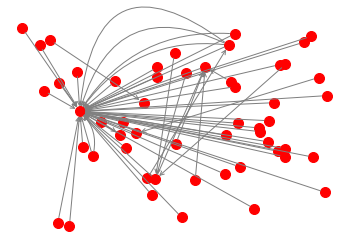

In [22]:
g = Graph(data)
g.show()

In [23]:
[h for h in g.getGraph().nodes]

['Elisa',
 'Lugo, Galicia',
 '18-05-1937',
 '82',
 'Juan',
 'Eva',
 'labrador',
 'Santander',
 '25-11-1911',
 'Barcelona',
 '12-01-1912',
 'seamstress',
 'family',
 '2',
 '6',
 'youngest of family',
 "La Salle's school",
 'all-girl catholic',
 'history',
 'drawing',
 'Veronica',
 'Luis',
 'friends',
 'hide-and-seek',
 "Elisa'father",
 'when Elisa was 13 years old',
 'with housework',
 'when Elisa was 15 years old',
 'because of poverty',
 'workshop sewing',
 'her work',
 'pretty dresses',
 'little brothers',
 "father's work",
 'bread every day',
 'to customers',
 "Santiago's university",
 'education',
 'in her university classes',
 'Maria',
 'Laura',
 '20 years old',
 'textile factory',
 'Burgos',
 'festivals',
 'Sergio',
 'to dance',
 'shop in Santander',
 'sewing shop',
 'hard',
 'beautiful church in Santander',
 '2 children',
 'Silvia',
 'Julio']

In [24]:
list(g.getGraph().edges.data())

[('Elisa',
  'Lugo, Galicia',
  {'relation': 'birth place', 'stage': 'timeless', 'themes': ['basic']}),
 ('Elisa',
  '18-05-1937',
  {'relation': 'birth date', 'stage': 'timeless', 'themes': ['basic']}),
 ('Elisa',
  '82',
  {'relation': 'years old', 'stage': 'timeless', 'themes': ['basic']}),
 ('Elisa',
  'Juan',
  {'relation': "father's name", 'stage': 'timeless', 'themes': ['basic']}),
 ('Elisa',
  'Eva',
  {'relation': "mother's name", 'stage': 'timeless', 'themes': ['basic']}),
 ('Elisa',
  'family',
  {'relation': 'wealthy',
   'stage': 'timeless',
   'themes': ['family', 'siblings']}),
 ('Elisa',
  'family',
  {'relation': 'large',
   'stage': 'timeless',
   'themes': ['family', 'siblings']}),
 ('Elisa',
  '2',
  {'relation': 'number of sisters',
   'stage': 'timeless',
   'themes': ['family', 'siblings']}),
 ('Elisa',
  '6',
  {'relation': 'number of brothers',
   'stage': 'timeless',
   'themes': ['family', 'siblings']}),
 ('Elisa',
  'youngest of family',
  {'relation': 'is',

In [25]:
triples_generator.saveFile() #guardo los datos

In [26]:
tg = TriplesGenerator('data/example.json')

In [27]:
triples = TripleList(data = triples_generator.to_json())
triples

[{'input': 'Elisa | birth place | Lugo, Galicia',
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': 'Elisa | birth date | 18-05-1937',
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': 'Elisa | years old | 82',
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': "Elisa | father's name | Juan",
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': "Elisa | mother's name | Eva",
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': 'Juan | occupation | labrador',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Juan | wife | Eva',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Juan | birth place | Santander',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Juan | birth date | 25-11-1911',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Eva | birth place | Barcelona',
  'tags': {'stage': 'timeless'

In [28]:
len(triples)

58

In [29]:
triples.filterbyStage("timeless")

[{'input': 'Elisa | birth place | Lugo, Galicia',
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': 'Elisa | birth date | 18-05-1937',
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': 'Elisa | years old | 82',
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': "Elisa | father's name | Juan",
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': "Elisa | mother's name | Eva",
  'tags': {'stage': 'timeless', 'themes': ['basic']}},
 {'input': 'Juan | occupation | labrador',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Juan | wife | Eva',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Juan | birth place | Santander',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Juan | birth date | 25-11-1911',
  'tags': {'stage': 'timeless', 'themes': ['family', 'parents']}},
 {'input': 'Eva | birth place | Barcelona',
  'tags': {'stage': 'timeless'

In [30]:
triples.filterbyTheme("siblings")

[{'input': 'Elisa | wealthy | family',
  'tags': {'stage': 'timeless', 'themes': ['family', 'siblings']}},
 {'input': 'Elisa | large | family',
  'tags': {'stage': 'timeless', 'themes': ['family', 'siblings']}},
 {'input': 'Elisa | number of sisters | 2',
  'tags': {'stage': 'timeless', 'themes': ['family', 'siblings']}},
 {'input': 'Elisa | number of brothers | 6',
  'tags': {'stage': 'timeless', 'themes': ['family', 'siblings']}},
 {'input': 'Elisa | is | youngest of family',
  'tags': {'stage': 'timeless', 'themes': ['family', 'siblings']}}]

In [31]:
triples.getTagStages()

{'adolescence',
 'early adulthood',
 'late adulthood',
 'late chilhood',
 'timeless'}

In [32]:
triples.getTagThemes()

{'basic',
 'family',
 'friends',
 'love',
 'parents',
 'school',
 'siblings',
 'university',
 'work'}

In [33]:
triples.triplesByTags()

{'timeless': {'tag': {'basic': {'input': ['Elisa | birth place | Lugo, Galicia',
     'Elisa | birth date | 18-05-1937',
     'Elisa | years old | 82',
     "Elisa | father's name | Juan",
     "Elisa | mother's name | Eva"]},
   'family': {'tag': {'parents': {'input': ['Juan | occupation | labrador',
       'Juan | wife | Eva',
       'Juan | birth place | Santander',
       'Juan | birth date | 25-11-1911',
       'Eva | birth place | Barcelona',
       'Eva | birth date | 12-01-1912',
       'Eva | occupation | seamstress']},
     'siblings': {'input': ['Elisa | wealthy | family',
       'Elisa | large | family',
       'Elisa | number of sisters | 2',
       'Elisa | number of brothers | 6',
       'Elisa | is | youngest of family']}}}}},
 'late chilhood': {'tag': {'school': {'input': ["Elisa | educated at | La Salle's school",
     "La Salle's school | was | all-girl catholic",
     'Elisa | favorite school subjects | history',
     'Elisa | favorite school subjects | drawing']},


In [34]:
#triples_generator.generateFile("data/Elisa.json")

In [35]:
df = pd.DataFrame(triples, columns = ['tags','input'])
df

,tags,input
0,"{'stage': 'timeless', 'themes': ['basic']}","Elisa | birth place | Lugo, Galicia"
1,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | birth date | 18-05-1937
2,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | years old | 82
3,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | father's name | Juan
4,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | mother's name | Eva
5,"{'stage': 'timeless', 'themes': ['family', 'pa...",Juan | occupation | labrador
6,"{'stage': 'timeless', 'themes': ['family', 'pa...",Juan | wife | Eva
7,"{'stage': 'timeless', 'themes': ['family', 'pa...",Juan | birth place | Santander
8,"{'stage': 'timeless', 'themes': ['family', 'pa...",Juan | birth date | 25-11-1911
9,"{'stage': 'timeless', 'themes': ['family', 'pa...",Eva | birth place | Barcelona


In [36]:
stages = triples.getTagStages()
stages

{'adolescence',
 'early adulthood',
 'late adulthood',
 'late chilhood',
 'timeless'}

## Clustering

In [37]:
print("stages: " + str(triples.getTagStages()))

stages: {'late chilhood', 'late adulthood', 'early adulthood', 'adolescence', 'timeless'}


In [38]:
#Seleccion de stages a mostrar
stageSelection = ['timeless', 'late chilhood', 'adolescence', 'early adulthood','late adulthood']


In [39]:
themesByStage = {}

for stage in stageSelection:
    themesByStage[stage] =  []

print(themesByStage)

for stage in stageSelection:
    themesByStage[stage].append(triples.filterbyStage(stage).getTagThemes())

themesByStage

{'timeless': [], 'late chilhood': [], 'adolescence': [], 'early adulthood': [], 'late adulthood': []}


{'timeless': [{'basic', 'family', 'parents', 'siblings'}],
 'late chilhood': [{'family', 'friends', 'school'}],
 'adolescence': [{'family', 'school', 'work'}],
 'early adulthood': [{'love', 'university', 'work'}],
 'late adulthood': [{'family', 'love', 'work'}]}

In [40]:
triples.getTagTrees()

{'timeless': {'basic': {}, 'family': {'parents': {}, 'siblings': {}}},
 'late chilhood': {'school': {}, 'friends': {}, 'family': {}},
 'adolescence': {'school': {}, 'work': {}, 'family': {}},
 'early adulthood': {'university': {}, 'work': {}, 'love': {}},
 'late adulthood': {'work': {}, 'family': {'love': {}}}}

In [41]:
themesSelection = {}
for stage in stageSelection:
    t = triples.filterbyStage(stage).getTagTrees()
    themesSelection[stage] = t[stage]

themesSelection

{'timeless': {'basic': {}, 'family': {'parents': {}, 'siblings': {}}},
 'late chilhood': {'school': {}, 'friends': {}, 'family': {}},
 'adolescence': {'school': {}, 'work': {}, 'family': {}},
 'early adulthood': {'university': {}, 'work': {}, 'love': {}},
 'late adulthood': {'work': {}, 'family': {'love': {}}}}

In [42]:
themesSelection = {'timeless': {'basic': {}, 'family': {'parents': {}, 'siblings': {}}},
 'late chilhood': {'school': {}, 'friends': {}, 'family': {}},
 'adolescence': {'school': {}, 'work': {}, 'family': {}},
 'early adulthood': {'university': {}, 'work': {}, 'love': {}},
 'late adulthood': {'work': {}, 'family': {'love': {}}}}
themesSelection

{'timeless': {'basic': {}, 'family': {'parents': {}, 'siblings': {}}},
 'late chilhood': {'school': {}, 'friends': {}, 'family': {}},
 'adolescence': {'school': {}, 'work': {}, 'family': {}},
 'early adulthood': {'university': {}, 'work': {}, 'love': {}},
 'late adulthood': {'work': {}, 'family': {'love': {}}}}

In [43]:
triples.triplesByTags()

{'timeless': {'tag': {'basic': {'input': ['Elisa | birth place | Lugo, Galicia',
     'Elisa | birth date | 18-05-1937',
     'Elisa | years old | 82',
     "Elisa | father's name | Juan",
     "Elisa | mother's name | Eva"]},
   'family': {'tag': {'parents': {'input': ['Juan | occupation | labrador',
       'Juan | wife | Eva',
       'Juan | birth place | Santander',
       'Juan | birth date | 25-11-1911',
       'Eva | birth place | Barcelona',
       'Eva | birth date | 12-01-1912',
       'Eva | occupation | seamstress']},
     'siblings': {'input': ['Elisa | wealthy | family',
       'Elisa | large | family',
       'Elisa | number of sisters | 2',
       'Elisa | number of brothers | 6',
       'Elisa | is | youngest of family']}}}}},
 'late chilhood': {'tag': {'school': {'input': ["Elisa | educated at | La Salle's school",
     "La Salle's school | was | all-girl catholic",
     'Elisa | favorite school subjects | history',
     'Elisa | favorite school subjects | drawing']},


In [44]:
def filteredTriplesByTags(triplesTree, themesSelection):
    if(len(themesSelection)==0):
        return
    else:
        diccionario = {}
        for t in themesSelection:
            if 'tag' in triplesTree[t]:
                diccionario[t] = filteredTriplesByTags(triplesTree[t]['tag'], themesSelection[t])
            else:        
                diccionario[t] = triplesTree[t]

        return diccionario
    
    

In [45]:
triples_filtered = filteredTriplesByTags(triples.triplesByTags(),themesSelection)
triples_filtered

{'timeless': {'basic': {'input': ['Elisa | birth place | Lugo, Galicia',
    'Elisa | birth date | 18-05-1937',
    'Elisa | years old | 82',
    "Elisa | father's name | Juan",
    "Elisa | mother's name | Eva"]},
  'family': {'parents': {'input': ['Juan | occupation | labrador',
     'Juan | wife | Eva',
     'Juan | birth place | Santander',
     'Juan | birth date | 25-11-1911',
     'Eva | birth place | Barcelona',
     'Eva | birth date | 12-01-1912',
     'Eva | occupation | seamstress']},
   'siblings': {'input': ['Elisa | wealthy | family',
     'Elisa | large | family',
     'Elisa | number of sisters | 2',
     'Elisa | number of brothers | 6',
     'Elisa | is | youngest of family']}}},
 'late chilhood': {'school': {'input': ["Elisa | educated at | La Salle's school",
    "La Salle's school | was | all-girl catholic",
    'Elisa | favorite school subjects | history',
    'Elisa | favorite school subjects | drawing']},
  'friends': {'input': ['Elisa | best friend | Veronica'

In [46]:
from math import ceil
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans 
import warnings
from sklearn.decomposition import PCA 
import numpy as np
import warnings
import nltk
from nltk.corpus import stopwords 
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns 
from collections import Counter
warnings.filterwarnings('ignore')



class TriplesClustering:

    def __init__(self, triples):
        triples['cleaned'] = triples['input'].apply(lambda x: self.__preprocess_text(x,remove_stopwords = True))
        self.triples = triples
        self.vectorized_triples = []
        self.clusters = np.zeros(shape=triples['input'].shape)
        self.vectorizer = ""
        
    def __preprocess_text(self, text : str, remove_stopwords: bool):
        # remove stopwords 
        if remove_stopwords: 
            # 1. tokenize 
            tokens = nltk.word_tokenize(text)
            # 2. check if stopword
            tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
            # 3. join back together
            text = " ".join(tokens) 
            # return text in lower case and stripped of whitespaces 
        text = text.lower().strip() 
        return text

    def setTriples(self, triples):
        self.triples = triples

    def getTriples(self):
        return self.triples

    def getVectorizedTriples(self):
        return self.vectorized_triples
    
    def getClusters(self):
        return self.clusters

    def cluster_mayor7(self): 
        conteo=Counter(self.clusters)

        for clave in conteo:  
            valor=conteo[clave]
            if valor >7:
                return True

        return False
        

    def genClusters(self):
        
        size = 7
        self.clusters = np.zeros(shape = len(self.triples['cleaned']), dtype = int)
        self.triples['cluster'] = self.clusters

        while(self.cluster_mayor7()):
            self.vectorizer = TfidfVectorizer(norm=None, max_df=1.0)

            self.vectorized_triples = self.vectorizer.fit_transform(self.triples['cleaned'])

            n_clusters= ceil(len(self.triples['cleaned'])/size)
            
            kmeans = KMeans(n_clusters=n_clusters)#, random_state=43)


            # fit the model
            kmeans.fit(self.vectorized_triples)
            # store cluster labels in a variable
            self.clusters = kmeans.labels_
            
            # initialize PCA with 2 components
            pca = PCA(n_components=2, random_state=42)
            # pass our X to the pca and store the reduced vectors into pca_vecs
            pca_vecs = pca.fit_transform(self.vectorized_triples.toarray())
            # save our two dimensions into x0 and x1
            x0 = pca_vecs[:, 0]
            x1 = pca_vecs[:, 1]

            self.triples['cluster'] = self.clusters
            self.triples['x0'] = x0
            self.triples['x1'] = x1

            size = size - 0.5
        
    def get_top_keywords(self, n_terms): 
        """This function returns the keywords for each centroid of the KMeans""" 

        X = self.getVectorizedTriples()
        clusters = self.getClusters()
        df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster 
        terms = self.vectorizer.get_feature_names_out() # access tf-idf terms 
        for i,r in df.iterrows(): 
            print('\nCluster {}'.format(i)) 
            print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
        
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
from math import ceil
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import warnings
from sklearn.decomposition import PCA 
import numpy as np
import warnings
import nltk
from nltk.corpus import stopwords 
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns 
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans



class TriplesClustering:

    def __init__(self, triples):
        triples['cleaned'] = triples['input'].apply(lambda x: self.__preprocess_text(x,remove_stopwords = True))
        triples['x0'] = 0
        triples['x1'] = 0
        triples['x2'] = 0
        self.triples = triples
        self.vectorized_triples = []
        self.clusters = np.zeros(shape=triples['input'].shape)
        self.vectorizer = ""

        
    def __preprocess_text(self, text : str, remove_stopwords: bool):
        # remove stopwords 
        if remove_stopwords: 
            # 1. tokenize 
            tokens = nltk.word_tokenize(text)
            # 2. check if stopword
            tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
            # 3. join back together
            text = " ".join(tokens) 
            # return text in lower case and stripped of whitespaces 
        text = text.lower().strip() 
        return text

    def setTriples(self, triples):
        self.triples = triples

    def getTriples(self):
        return self.triples

    def getVectorizedTriples(self):
        return self.vectorized_triples
    
    def getClusters(self):
        return self.clusters

    def cluster_mayor7(self): 
        conteo=Counter(self.clusters)
        print(conteo)

        for clave, valor in conteo.items():  
            valor=conteo[clave]

            if valor >7:
                return df.loc[self.triples['cluster'] == clave].index

        return []
        

    def genClusters(self):
        
        self.clusters = np.zeros(shape = len(self.triples['cleaned']), dtype = int)
        self.triples['cluster'] = self.clusters
        mayor7_index = self.cluster_mayor7()
        number_clusters = 0

        while(len(mayor7_index)>0):
    
            self.vectorizer = TfidfVectorizer(norm=None, max_df=0.5)

            self.vectorized_triples = self.vectorizer.fit_transform(self.triples['cleaned'].iloc[mayor7_index])
            
            n_clusters = ceil(len(mayor7_index)/7)
        
            kmeans = KMeans(n_clusters=n_clusters, random_state=43)

            # fit the model
            kmeans.fit(self.vectorized_triples)
            # store cluster labels in a variable
            clusters = kmeans.labels_
            
            # initialize PCA with 2 components
            pca = PCA(n_components=3, random_state=40)
            # pass our X to the pca and store the reduced vectors into pca_vecs
            pca_vecs = pca.fit_transform(self.vectorized_triples.toarray())
            # save our two dimensions into x0 and x1
            x0 = pca_vecs[:, 0]
            x1 = pca_vecs[:, 1]
            x2 = pca_vecs[:, 2]
            
            for i in range(0,len(clusters)):
                clusters[i] = clusters[i] + number_clusters


            for i in range(len(mayor7_index)):
                self.triples['cluster'][mayor7_index[i]] = clusters[i]
                self.triples['x0'][mayor7_index[i]] = x0[i]
                self.triples['x1'][mayor7_index[i]] = x1[i]
                self.triples['x2'][mayor7_index[i]] = x2[i]

            self.clusters = self.triples['cluster']
            mayor7_index = self.cluster_mayor7()
            number_clusters= np.max(clusters) + 1
        
    def get_top_keywords(self, n_terms): 
        """This function returns the keywords for each centroid of the KMeans""" 

        X = self.getVectorizedTriples()
        clusters = self.getClusters()
        df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster 
        terms = self.vectorizer.get_feature_names_out() # access tf-idf terms 
        for i,r in df.iterrows(): 
            print('\nCluster {}'.format(i)) 
            print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
        
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [206]:
from math import ceil
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from k_means_constrained import KMeansConstrained
import warnings
from sklearn.decomposition import PCA 
import numpy as np
import warnings
import nltk
from nltk.corpus import stopwords 
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns 
from collections import Counter
warnings.filterwarnings('ignore')
import re



class TriplesClustering:

    def __init__(self, triples):
        triples['cleaned'] = triples['input'].apply(lambda x: self.__preprocess_text(x,remove_stopwords = True))
        self.triples = triples
        self.vectorized_triples = []
        self.clusters = np.zeros(shape=triples['input'].shape)
        self.vectorizer = ""
        self.km = ""
        
    def __preprocess_text(self, text : str, remove_stopwords: bool):
        #text = text.replace("|"," ")
        #text = re.sub("[0-9]*-[0-9]*-[0-9]*", "fecha", text)
        # remove stopwords 
        if remove_stopwords: 
            # 1. tokenize 
            tokens = nltk.word_tokenize(text)
            # 2. check if stopword
            tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
            # 3. join back together
            text = " ".join(tokens) 
            # return text in lower case and stripped of whitespaces 
        text = text.lower().strip() 
        return text

    def setTriples(self, triples):
        self.triples = triples

    def getTriples(self):
        return self.triples

    def getVectorizedTriples(self):
        return self.vectorized_triples
    
    def getClusters(self):
        return self.clusters

    def cluster_mayor7(self): 
        conteo=Counter(self.clusters)

        for clave in conteo:  
            valor=conteo[clave]
            if valor >7:
                return True

        return False
        

    def genClusters(self):
        
        size = 5
        self.clusters = np.zeros(shape = len(self.triples['cleaned']), dtype = int)
        self.triples['cluster'] = self.clusters

        if(self.cluster_mayor7()):
            self.vectorizer = TfidfVectorizer(norm='l2', sublinear_tf=True,)

            self.vectorized_triples = self.vectorizer.fit_transform(self.triples['cleaned'])

            n_clusters = ceil(len(self.triples['cleaned'])/6)
            random_state = np.random.randint(low=100)
            
            kmeans = KMeansConstrained(n_clusters = n_clusters, random_state = 8,size_min=3,size_max=6)#8,22, 48     69(mejor)
            self.km = kmeans

             # fit the model
            kmeans.fit(self.vectorized_triples.toarray())
            # store cluster labels in a variable
            self.clusters = kmeans.labels_
            
            
            # initialize PCA with 2 components
            pca  = PCA(n_components=3, random_state=40)
            # pass our X to the pca and store the reduced vectors into pca_vecs
            pca_vecs = pca.fit_transform(self.vectorized_triples.toarray())
            # save our two dimensions into x0 and x1
            x0 = pca_vecs[:, 0]
            x1 = pca_vecs[:, 1]
            x2 = pca_vecs[:, 2]
            
            self.triples['cluster'] = self.clusters
            self.triples['x0'] = x0
            self.triples['x1'] = x1
            self.triples['x2'] = x2

           

        
    def get_top_keywords(self, n_terms): 
        """This function returns the keywords for each centroid of the KMeans""" 

        X = self.getVectorizedTriples()
        clusters = self.getClusters()
        df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster 
        terms = self.vectorizer.get_feature_names_out() # access tf-idf terms 
        for i,r in df.iterrows(): 
            print('\nCluster {}'.format(i)) 
            print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
        
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [207]:
print(triples[0]['input'])

vectorizer = TfidfVectorizer(norm=None, sublinear_tf=True)
vec = vectorizer.fit_transform(['Elisa | birth place | London', 'Elisa | birth date |19 August '])
print(vectorizer.get_feature_names_out())
print(vec.toarray())

Elisa | birth place | Lugo, Galicia
['19' 'august' 'birth' 'date' 'elisa' 'london' 'place']
[[0.         0.         1.         0.         1.         1.40546511
  1.40546511]
 [1.40546511 1.40546511 1.         1.40546511 1.         0.
  0.        ]]


### Sin filtrar

In [216]:
def clusteringNoTags(stages, triples):
    max_cluster = 0
    clusters = pd.DataFrame(columns=['input','cleaned','tags','cluster','x0','x1','x2'])
    c = {}

    for stage in stages:
        clustering = TriplesClustering(triples[triples['tags'].astype(str).str.contains("'stage': '"+stage+ "'")])

        clustering.genClusters()
        result = clustering.getTriples()

        for indx, item in result.iterrows():
            result['cluster'][indx] = result['cluster'][indx] + max_cluster

        max_cluster = max(result['cluster']) +1 
        clusters = pd.concat([clusters, result])
        c[stage] = clustering


    return clusters, c
    

In [217]:
df = pd.DataFrame(triples, columns = ['tags','input'])

In [220]:
clusters_triples, clustering = clusteringNoTags(['timeless','late chilhood', 'adolescence','early adulthood','late adulthood'],df)

In [221]:
c = clusters_triples[clusters_triples['tags'].astype(str).str.contains('timeless')]
del c['cleaned']
pd.set_option('display.width', 2)
c


,input,tags,cluster,x0,x1,x2
0,"Elisa | birth place | Lugo, Galicia","{'stage': 'timeless', 'themes': ['basic']}",1,-0.137366,0.504021,0.028684
1,Elisa | birth date | 18-05-1937,"{'stage': 'timeless', 'themes': ['basic']}",1,-0.060467,0.353556,0.067661
2,Elisa | years old | 82,"{'stage': 'timeless', 'themes': ['basic']}",2,0.191303,-0.014928,0.128164
3,Elisa | father's name | Juan,"{'stage': 'timeless', 'themes': ['basic']}",0,0.011028,-0.325746,0.04934
4,Elisa | mother's name | Eva,"{'stage': 'timeless', 'themes': ['basic']}",0,0.011028,-0.325746,0.04934
5,Juan | occupation | labrador,"{'stage': 'timeless', 'themes': ['family', 'pa...",0,-0.26786,-0.498253,-0.107285
6,Juan | wife | Eva,"{'stage': 'timeless', 'themes': ['family', 'pa...",0,-0.35164,-0.365749,-0.095548
7,Juan | birth place | Santander,"{'stage': 'timeless', 'themes': ['family', 'pa...",1,-0.430687,0.321558,-0.064953
8,Juan | birth date | 25-11-1911,"{'stage': 'timeless', 'themes': ['family', 'pa...",1,-0.314949,0.182539,-0.025303
9,Eva | birth place | Barcelona,"{'stage': 'timeless', 'themes': ['family', 'pa...",1,-0.430687,0.321558,-0.064953


In [212]:
clustering['timeless'].get_top_keywords(3)


Cluster 0
occupation,juan,eva

Cluster 1
date,place,birth

Cluster 2
number,family,elisa


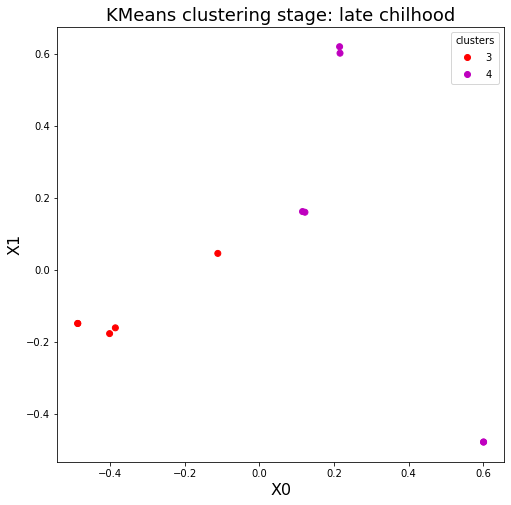

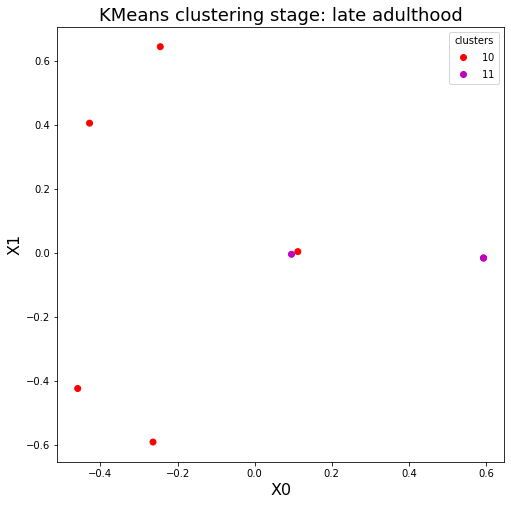

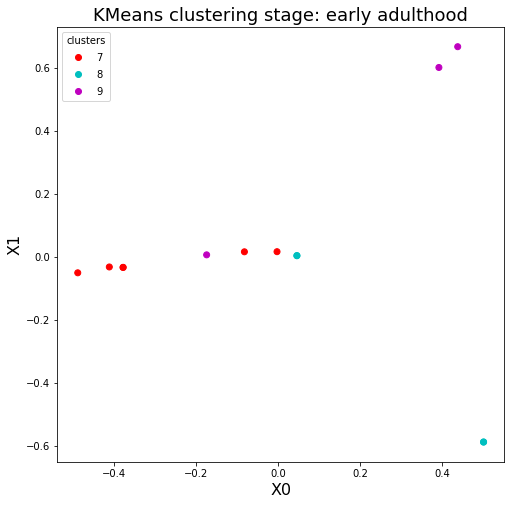

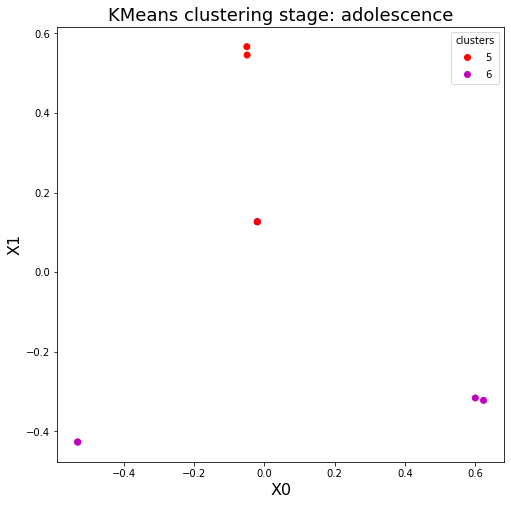

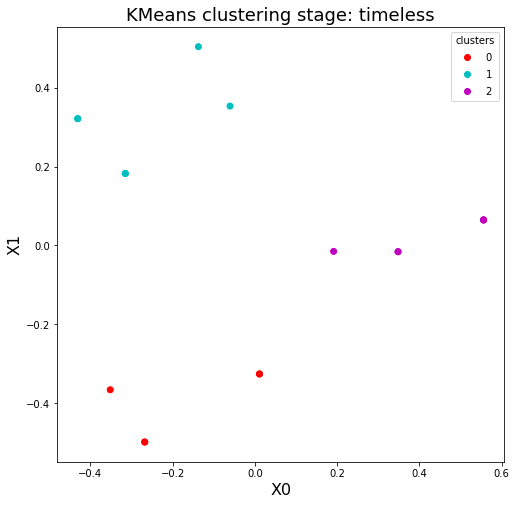

In [222]:
from matplotlib.colors import ListedColormap
from scipy.spatial import ConvexHull

for stage in triples.getTagStages():
    c = clustering[stage]
    # set image size and colors
    colors = ['r','g','b','c','y','k','m']
    fig, ax = plt.subplots(figsize=(8, 8))

    # set a title
    plt.title(f"KMeans clustering stage: {stage}", fontdict={"fontsize": 18})

    show_df = clusters_triples[clusters_triples['tags'].astype(str).str.contains("'stage': '"+stage+ "'")]

    # set axes names
    plt.xlabel("X0", fontdict={"fontsize": 16})
    plt.ylabel("X1", fontdict={"fontsize": 16})

    # create scatter plot with seaborn, where hue is the class used to group the data
    scater = plt.scatter(show_df['x0'], show_df['x1'], c=show_df['cluster'], cmap=ListedColormap(colors))
    ax.legend(*scater.legend_elements(), title='clusters')

plt.show()

### Filtrando por etapa de la vida

In [340]:
def clusteringByStage(triples):
    clusters = []
    t = pd.DataFrame(triples, columns = ['tags','input'])

    for stage in triples.getTagStages():

        triples_filtered = t[t['tags'].astype(str).str.contains(stage)]

        clustering = TriplesClustering(triples_filtered)
        clustering.genClusters()
        print(stage.upper())
        clustering.get_top_keywords(5)
        
        clusters.append(clustering)
        


        
        # set image size
        plt.figure(figsize=(12, 7))
        # set a title
        plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
        # set axes names
        plt.xlabel("X0", fontdict={"fontsize": 16})
        plt.ylabel("X1", fontdict={"fontsize": 16})
        # create scatter plot with seaborn, where hue is the class used to group the data
        sns.scatterplot(data=clustering.getTriples(), x='x0', y='x1', hue='cluster', palette="viridis")
        plt.show()
        print("-----------------")

    return clusters

LATE ADULTHOOD

Cluster 0
silvia,julio,worked,name,elisa

Cluster 1
bought,beautiful,elisa,santander,shop


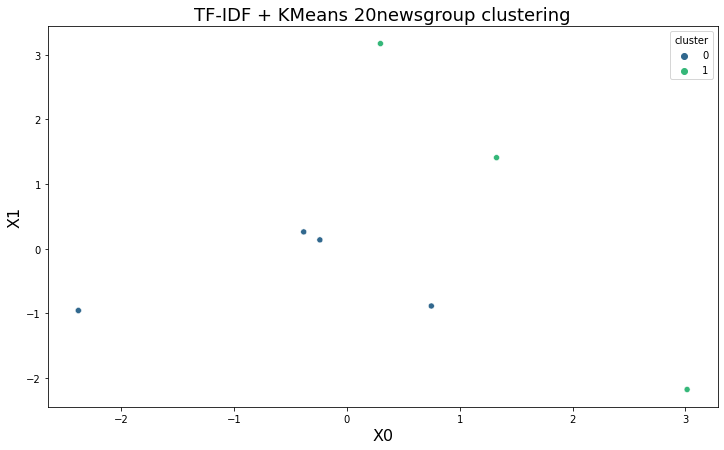

-----------------
ADOLESCENCE

Cluster 0
little,liked,bread,work,elisa

Cluster 1
old,years,elisa,drop,school


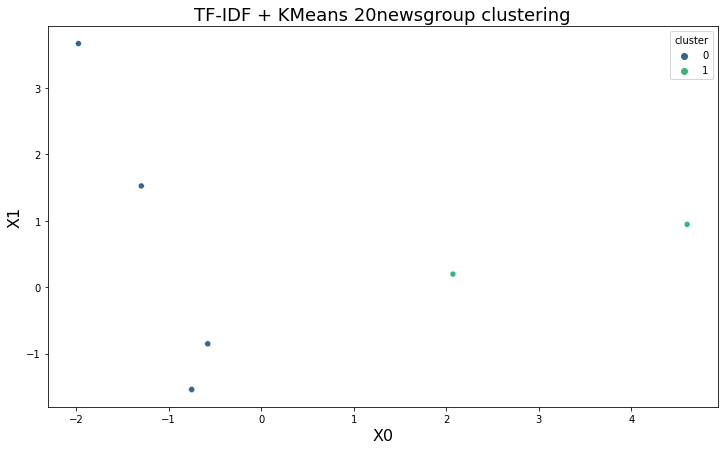

-----------------
LATE CHILHOOD

Cluster 0
friend,best,subjects,favorite,elisa

Cluster 1
all,girl,school,la,salle


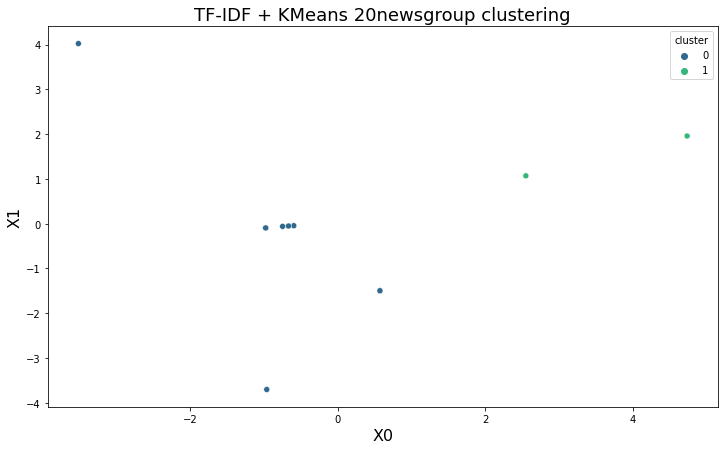

-----------------
EARLY ADULTHOOD

Cluster 0
started,work,20,old,years

Cluster 1
textile,university,friend,sergio,elisa


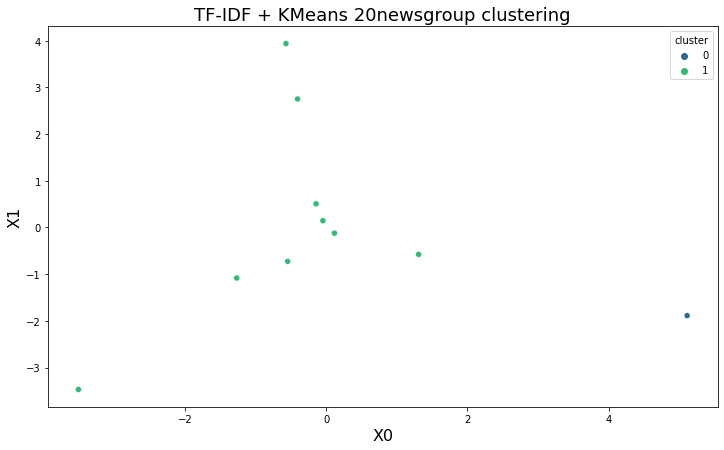

-----------------
TIMELESS

Cluster 0
birthdate,name,occupation,juan,eva

Cluster 1
large,youngest,number,family,elisa

Cluster 2
elisa,birthdate,18,05,1937


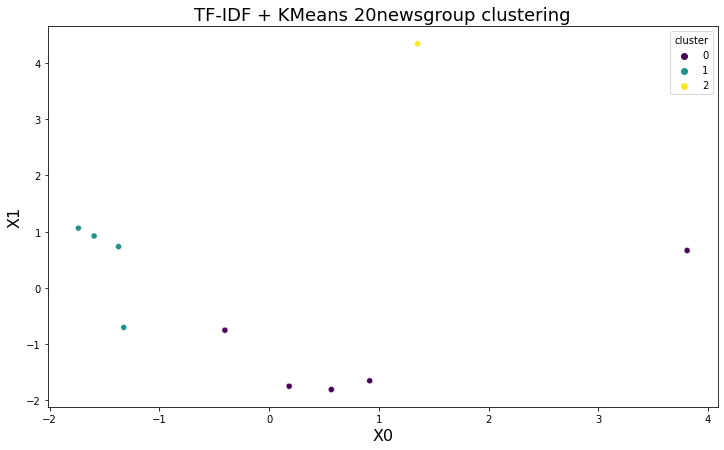

-----------------


In [341]:
clusters = clusteringByStage(triples)

In [371]:
final_triples = pd.DataFrame()
cluster_used = set()
for c in clusters:
    t = c.getTriples()
    for i in t['cluster']: cluster_used.add(i)
    

    final_triples = final_triples.append(t)

final_triples = final_triples.sort_index()

{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1, 2}


In [363]:
final_triples

,tags,input,cleaned,cluster,x0,x1
0,"{'stage': 'timeless', 'themes': ['basic']}","Elisa | birthPlace | Lugo, Galicia",elisa birthplace lugo galicia,1,-1.323411,-0.704030
1,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | birthDate | 18-05-1937,elisa birthdate 18-05-1937,2,1.353157,4.343118
2,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | years old | 82,elisa years old 82,1,-1.736962,1.062186
3,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | father's name | Juan,elisa father name juan,0,-0.402061,-0.751997
4,"{'stage': 'timeless', 'themes': ['basic']}",Elisa | mother's name | Eva,elisa mother name eva,0,-0.402061,-0.751997
5,"{'stage': 'timeless', 'themes': ['family', 'pa...",Juan | occupation | labrador,juan occupation labrador,0,0.567320,-1.806849
6,"{'stage': 'timeless', 'themes': ['family', 'pa...",Juan | wife | Eva,juan wife eva,0,0.916722,-1.651969
7,"{'stage': 'timeless', 'themes': ['family', 'pa...",Juan | birthPlace | Santander,juan birthplace santander,0,0.183248,-1.748647
8,"{'stage': 'timeless', 'themes': ['family', 'pa...",Juan | birthDate | 25-11-1911,juan birthdate 25-11-1911,0,3.808800,0.664620
9,"{'stage': 'timeless', 'themes': ['family', 'pa...",Eva | birthPlace | Barcelona,eva birthplace barcelona,0,0.183248,-1.748647


### Filtrando por etapa de la vida y tema

In [343]:

def clusteringByTags(triples_filtered):

    triplesClustersList = {}

    for tag in triples_filtered:

        if tag == 'input':
            clustering = TriplesClustering(triples_filtered)
            clustering.genClusters()
            return {'input' : clustering.getTriples()}
               
        triplesClustersList[tag] = clusteringByTags(triples_filtered[tag])
    
    return triplesClustersList

In [344]:
 triplesClusters = clusteringByTags(triples_filtered)
 triplesClusters

AttributeError: 'list' object has no attribute 'apply'

## Generate Text

In [31]:
model = Model.Model() 

model.load_model("models/T5_webnlg_5000samples_2epochs")

Running on the CPU


In [32]:

import numpy as np
import random

In [33]:
def printInput(triplesClusters):
    for item in triplesClusters:
        if(item=='input'):
            cluster_set = set(triplesClusters[item]['cluster'])
            

            for c in cluster_set:         
                #print("cluster : " + str(c))       
                index = np.where(triplesClusters[item]['cluster']==c)[0]
                input =  []
                for i in index:
                    input.append(triplesClusters[item]['input'][i])
                
                #print(input)
                triple2sen = Triples2Sentence(input)
                prompt = triple2sen.getText()

                print(prompt)
                
                #for output in outputs:
                #    print(model.decode(output))
                #print("--------------")


        else:
            #print("----------" + item + "----------")
            printInput(triplesClusters[item])

printInput(triplesClusters)

Elisa | birthPlace | Lugo, Galicia && Elisa | birthDate | 18-05-1937 && Elisa | years old | 82 && Elisa | father's name | Juan && Elisa | mother's name | Eva 
Juan | occupation | labrador && Juan | wife | Eva && Juan | birthPlace | Santander && Juan | birthDate | 25-11-1911 && Eva | birthPlace | Barcelona && Eva | birthDate | 12-01-1912 && Eva | occupation | seamstress 
Elisa | wealthy | family && Elisa | large | family && Elisa | number of sisters | 2 && Elisa | number of brothers | 6 && Elisa | is | youngest of family 
Elisa | educated at | La_Salle's_school && La Salle's school | was | all-girl catholic && Elisa | favorite school subjects | history && Elisa | favorite school subjects | drawing 
Elisa | best friend | Veronica && Elisa | best friend | Luis && Elisa | played with | friends && Elisa | favorite games | hide-and-seek && Elisa | go swimming with | friends 
Elisa'father | died | when Elisa was 13 years old && Elisa | help her mother | with housework 
Elisa | drop out of sch

In [60]:

def printText(triplesClusters):
    for item in triplesClusters:
        if(item=='input'):
            cluster_set = set(triplesClusters[item]['cluster'])
            

            for c in cluster_set:         
                #print("cluster : " + str(c))       
                index = np.where(triplesClusters[item]['cluster']==c)[0]
                input =  []
                for i in index:
                    input.append(triplesClusters[item]['input'][i])
                
                #print(input)
                triple2sen = Triples2Sentence(input)
                prompt = triple2sen.getText()

                inputs_id = model.encode(prompt=prompt)
                outputs = model.generateText(inputs_id, do_sample = False, num_beams = 10, no_repeat_ngram_size =5,
            min_length = 0, max_length = 1000, top_k = 50, top_p = 5, temperature = 1.5,
            penalty = 18.2, num_return_sequences = 3,  early_stopping = True)

                number = random.randint(0, 2)
                text = model.decode(outputs[number])
                text = text.replace('<pad>', '')
                text = text.replace('</s>', '')
                print(text)
                
                #for output in outputs:
                #    print(model.decode(output))
                #print("--------------")


        else:
            #print("----------" + item + "----------")
            printText(triplesClusters[item])




In [61]:
printText(triplesClusters)

 Elisa was born in Lugo, Galicia on May 5th 1835. She is 82 years old and her father's name is Juan; she also has Eva as the mother.
 Juan was born in Santander on 25 November 1911. He worked as a labrador and is married to Eva who was born in Barcelona on January 1, 12th, 2012.
 Elisa was born in a wealthy family with 2 sisters. She has 6 brothers and is the youngest of her family.            
 Elisa was educated at La Salle's school which is all-girl catholic. His favorite subjects include history and drawing.
 Elisa's favorite games are hide-and-seek and she played with Veronica and Luis. She also went swimming with friends.
 Elisa's father died when she was 13 years old and helped her mother with housework.
 Elisa's drop out of school was because of poverty and she was 15 years old.
 Elisa, who sewed pretty dresses, worked at the workshop sewing. She liked her work and was a member of the group Sweet Dresses. 
 Elisa, who is a father's work, prepares bread every day and serves to c

### EL MEJOR DE MOMENTO

Elisa was born in Lugo, Galicia on May 5th 1835. She is 82 years old and her full name is Elisa Ruiz. The father's name is Juan and the mother's name is Eva.
 Juan was born in Santander on 25 November 1911. He worked as a labrador and is married to Eva, who was born in Barcelona on January 1, 12th, 2011. 
 Elisa was born in a wealthy family with 2 sisters and 6 brothers. Elisa, who is the youngest of her family, lived in the same family as Elisa.
 Elisa was educated at La Salle's school which is all-girl catholic. She studied History and Drawing.  
 Elisa's favorite games are hide-and-seek and she played with Veronica and Luis. She also went swimming with friends. 
 Elisa's father died when she was 13 years old and helped her mother with housework.    
 Elisa, who was 15 years old, dropped out of school because of poverty.
 Elisa, who sewed pretty dresses, worked at the workshop sewing. She liked her work and was a member of the cast of Pretty Dresses.
 Elisa, whose father was at work, prepares bread every day and serves as a service to customers. Elisa's family includes the cows and her little brothers. 
 Elisa Studied at the University of Santiago. She is best friends with Maria and Laura. Elisa, who has met new friends during her career, attended UC Berkeley.
 Elisa began working at 20 years old and worked in a textile factory located in Burgos, Burgos.
 Elisa is a dancer who began dating Sergio and performs festivals.            
 Elisa bought a sewing shop in Santander and worked until late night.   
 Elisa married Sergio. She has two children, Silvia and Julio.


        (inputs_id, do_sample = False, num_beams = 7, no_repeat_ngram_size = 5,
            min_length = 6, max_length = 1000, top_k = 50, top_p = 0.43, temperature = 55.5,
            penalty = 5.6, num_return_sequences = 3,  early_stopping = False)

Elisa Ruiz was born in Lugo, Galicia on May 5, 1835. She is 82 years old and her father is Juan.   
 Juan was born in Santander on 25 November 1911. He worked as a labrador and was married to Eva, whose birthdate was 25-11-1912 in Barcelona.  
 Elisa, who is the youngest of the family, has 2 sisters and 6 brothers. She was born in a wealthy family. 
 Elisa was educated at La Salle's school which is all-girl catholic. She studied History and Drawing.
 Elisa's favorite games are hide-and-seek and Veronica and Luis are her best friends.      
 Elisa's father died in 13 years of age and helped her mother with housework.  
 Elisa's drop out of school was because of poverty and she was 15 years old.
 Elisa worked at the workshop sewing and was a fan of her work. She sewed pretty dresses.
 Elisa, whose father was at work, is a cower and prepares bread every day. She is also the one to bring bread to customers. 
 Elisa, who was educated at Santiago's university, attended Maria and Laura. She was a student at the University of Santiago.
 Elisa was born in 20 years old and worked in the textile factory in Burgos.  
 Elisa, who started dating Sergio, was a dancer and performs festivals. 
 Elisa bought a sewing shop in Santander and worked until late.        
 Elisa was married to Sergio and Silvia. She was born in Santander and had 2 children.


        (inputs_id, do_sample = False, num_beams = 10, no_repeat_ngram_size = 2,
            min_length = 0, max_length = 1000, top_k = 50, top_p = 0.2, temperature = 1.5,
            penalty = 1.2, num_return_sequences = 3,  early_stopping = True)

In [260]:
def printAllText(triplesClusters, do_sample = False, num_beams = 5, no_repeat_ngram_size = 2, min_length = 0, max_length = 500, top_k = 4, top_p = 0.30, temperature = 0.8, penalty = 0.5, num_return_sequences = 1, early_stopping = False):
    for item in triplesClusters:
        if(item=='input'):
            cluster_set = set(triplesClusters[item]['cluster'])

            for c in cluster_set:             
                index = np.where(triplesClusters[item]['cluster']==c)[0]
                input =  []
                for i in index:
                    input.append(triplesClusters[item]['input'][i])
                
                triple2sen = Triples2Sentence(input)
                prompt = triple2sen.getText()

                inputs_id = model.encode(prompt=prompt)
                outputs = model.generateText(inputs_id , do_sample, num_beams, no_repeat_ngram_size,len(input)*min_length, max_length, top_k , top_p, temperature, penalty , num_return_sequences, early_stopping)

                for output in outputs:
                    text = model.decode(output)
                    text = text.replace('<pad>', '')
                    text = text.replace('</s>', '')
                    print(text)

        else:
            printAllText(triplesClusters[item],do_sample, num_beams, no_repeat_ngram_size,min_length, max_length, top_k , top_p, temperature, penalty , num_return_sequences, early_stopping)

Con parametros por defecto = 

        outputs = model.generateText(encode_text = inputs_id, do_sample = False, num_beams = 5, no_repeat_ngram_size = 2,
            min_length = 0, max_length = 500, top_k = 1, top_p = 0.95, temperature = 0.7, penalty = 1.0, num_return_sequences = 1, early_stopping = True)


Elisa Ruiz was born in Lugo, Galicia on May 5, 1835. She was 82 years old and his father was Juan. 
Juan, whose husband is Eva, was born in Santander on 25-11-1911 in Barcelona. Juan was a labrador and is married to Eva.Elisa, whose siblings include 2 sisters and 2 sisters, has a family of her own. She was born in a large family and is a member of the family of 8 siblings.
Elisa, whose favorite subject is history, attended La Salle's school which was all-girl catholic.
Elisa's favorite games are hide-and-seek and she played with Veronica and Luis. She also played with friends.
Elisa, whose parents worked at work, cares for the little brothers.
Elisa, whose father worked at work, prepares bread every day and cares for cows.      
        
        
        (triplesClusters, do_sample = False, num_beams = 30, no_repeat_ngram_size = 2,
            min_length = 0, max_length = 500, top_k = 2, top_p = 0.10, temperature = 0.5,
             penalty = 1.1, num_return_sequences = 1,  early_stopping = True)



 Elisa was born in Lugo, Galicia on May 5th 1835. She was 82 years old and her father was Juan.
 Juan was born in Santander on 25 November 1911. He worked as a labrador and was married to Eva. Juan, born on the 25th November, 2011 in Barcelona.
 Elisa, who has 2 sisters, has a family of 10 members and has 6 brothers. She was born in the family and is wealthy.
 Elisa was born in La Salle's school which was all-girl catholic. She studied History and Drawing.
 Elisa played hide and seek with friends and Veronica and Luis. She also went swimming with her friends.
 Elisa's father died in 13 years of age and she was a mother at home.
 Elisa, who was 15 years old, dropped out of school because of poverty.
 Elisa, who worked at the workshop sewing, liked her work and sewed pretty dresses.
 Elisa, who prepares bread every day and cares for the cows, is a part of the fathe's work. She is also the one to bring bread to customers.
 Elisa was born in Santiago's university and studied at the University of Santiago. Maria and Laura are her best friends. She is also the best friend of Elisesa.
 Elisa went on to work in the fields of the field of agriculture.


        (triplesClusters, do_sample = False, num_beams = 2, no_repeat_ngram_size = 2,
            min_length = 0, max_length = 1000, top_k = 20, top_p = 0.12, temperature = 1.5,
            penalty = 1.1, num_return_sequences = 1,  early_stopping = False)

            
Elisa Ruiz was born in Lugo, Galicia on May 5, 1835. She is 82 years old and Juan is her father's name.
 Juan was born in Santander on 25th November, 11th, 2011. He worked as a labrador and was married to Eva, whose birthdate was 25-11-1912 in Barcelona.
 Elisa, whose family includes 10 members and 2 sisters, was born in a wealthy family. She has 6 brothers and 10 sisters.
 Elisa was born in La Salle's school which was all-girl catholic. She studied History and Drawing.
 Elisa's favorite games are hide-and-seek and she played with Veronica and Luis. She also went swimming with friends.
 Elisa's father died in 13 years of age and she was helped by her mother at home.
 Elisa, who was 15 years old, dropped out of school because of poverty.
 Elisa, who worked at the workshop sewing, liked her work and sewed pretty dresses.
 Elisa, who prepares bread every day and cares for the cows, is a part of the fathe's work. She is also the one to bring bread to customers.
 Elisa, who has Maria as one of her best friends, was educated at Santiago's university. She later became a member of the family of Maria and Laura.
 Elisa went on to work in the fields of agriculture.



        (triplesClusters, do_sample = False, num_beams = 150, no_repeat_ngram_size =2,
            min_length = 6, max_length = 1000, top_k = 100, top_p = 0.23, temperature = 1.5,
            penalty = 1.0, num_return_sequences = 1,  early_stopping = False)

In [293]:
printAllText(triplesClusters, do_sample = False, num_beams = 1, no_repeat_ngram_size = 2,
            min_length = 6, max_length = 1000, top_k = 50, top_p = 0.23, temperature = 1.9,
            penalty = 0.8, num_return_sequences = 1,  early_stopping = False)

 Elisa was born in Lugo, Galicia on May 5, 1835. She was 82 years old and was married to Juan. Elias was also born on the May 5th, 1857.


### num_beans

In [637]:
printAllText(triplesClusters, num_beams=10)

 Elisa was born in Lugo, Galicia on May 5th, 1835. She was 82 years old and was married to Juan.
 Juan was born in Santander on 25 November 1911. He worked as a labrador and was married to Eva, whose birthdate was 25-11-1912 in Barcelona.
 Elisa, who has 8 siblings and 2 sisters, is wealthy and has a family of her own. She was born in her family and grew up in the family.
 Elisa was educated at La Salle's school which was all-girl catholic. Her favorite subject is history.
 Elisa's favorite games are hide-and-seek and she played with Veronica and Luis. She also went swimming with friends.
 Elisa was born in her mother's home and died in 13 years old. She was also a caretaker of little brothers.
 Elisa, who cares for cows, prepares bread every day and performs fathe's work.


In [638]:
printAllText(triplesClusters, num_beams=20)

KeyboardInterrupt: 

In [ ]:
printAllText(triplesClusters, num_beams=30)

 Elisa was born in Lugo, Galicia on May 5, 1835. She is also known as Eva and is 82 years old.
 Juan was born in Santander on 25 November 1911. He worked as a labrador and was married to Eva, whose birthdate was 25-11-1912 in Barcelona.


KeyboardInterrupt: 

### No_repeat_ngram_size

In [ ]:
printAllText(triplesClusters, no_repeat_ngram_size=1)

<pad> Elisa Ruiz was born 1937 in Lugo, Galician. She is 82 years old and has been married to the daughter of Mario or Eva Rubenza (born 1936).</s>
<pad> Eva was born in Santander, Cantabria on August 1935. She is the first time she has been married to an exponent of beauty and fun!</s>
<pad> Mario is a labrador who died in 1948. He was married to Eva, an exponent of the word "manufacturer".</s>
<pad> Elisa was born in the poor and has 8 siblings. She is married to 2 sisters, who are also members of her family (larger).</s>
<pad> Elisa was born in La Salle, which is home to an all-girl catholic school.</s>
<pad> Veronica is the best friend of Elisa, who was born in New York. She has also worked with Luis Aylone (born) and works as an ex-girlfriend to her former friends;</s>
<pad> Elisa, who was born in the city of London and her parents were at work. She cared for little brothers but she has also been able to help out with other things such as baby brother or even an extra-parental job

In [ ]:
printAllText(triplesClusters, no_repeat_ngram_size=3)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria on August 1935. She was married to Maria, who was born on August 19, 1835.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. Elise's siblings include 2 sisters and 6 brothers.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa, whose best friend is Luisa, was born in Veronica and was the best friend of Veronica.</s>
<pad> Elisa, who was born with a little brother, was a helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She was also a cows cook.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [ ]:
printAllText(triplesClusters, no_repeat_ngram_size=5)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She was the daughter of Mario and Eva was the daughter of Elisa.</s>
<pad> Eva was born in Santander, Cantabria on August 1935. She was married to the beautiful Santander church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and has 8 siblings. Elisa is a member of the 6 brothers in the family.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics. She was educated at La Salle's School, which is part of the school.</s>
<pad> Elisa's best friend is Veronica and her best friend is Luisa.</s>
<pad> Elisa, a little brother of Elisa, was born in the same city. Elisa was a helper of parents at work and cares for the little brothers.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She was also a cows nurse. Elisa prepares bread every day.</s>
<pad> Elisa is a dancer who is a member of the town p

### Beams & ngram_size

In [ ]:
printAllText(triplesClusters, num_beams = 10, no_repeat_ngram_size = 3)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Mario was born in Santander, Cantabria on August 1935. He was married to Eva, who was born on August 19, 1835.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the 6 brothers in the family.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa, whose best friend is Luisa, was born in Veronica and was the best friend of Veronica.</s>
<pad> Elisa, who was born with a little brother, is a carer of little brothers. She was also a helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also cared for cows.</s>
<pad> Elisa dances at town parties and is a dancer. She also likes to meet new friends.</s>


In [43]:
printAllText(triplesClusters, num_beams = 20, no_repeat_ngram_size = 2)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, which is located in Cantabria. She was married on August 1935.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's largest families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Luisa is the best friend of Elisa, who was born in Veronica.</s>
<pad> Elisa, who was born in London, cares for the little brothers. She was also a helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also cared for cows.</s>
<pad> Elisa, who was born in the city, dances at town parties. She also likes to meet new friends.</s>


In [44]:
printAllText(triplesClusters,num_beams = 20, no_repeat_ngram_size = 5)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She was the daughter of Mario and Eva was the daughter of Elisa.</s>
<pad> Eva was born in Santander, Cantabria on August 1935. She was married to a beautiful church in Santander.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the family of poor, poor Elisa. Elisa's siblings are 2 sisters and 6 brothers.</s>
<pad> Elisa was born in La Salle's school. All-girl catholic Elisa was a student at La Salle.</s>
<pad> Elisa's best friend is Veronica and her best friend is Luisa.</s>
<pad> Elisa, a little brother of Elisa, was born in the same city. She was also a helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked as a cows nurse. Elisa prepares bread every day.</s>
<pad> Elisa dances at town parties and is a dancer. She also likes to meet new friends.</s>


In [45]:
printAllText(triplesClusters,num_beams = 20, no_repeat_ngram_size = 15)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She was the daughter of Mario and Eva was the daughter of Elisa.</s>
<pad> Mario was born in Santander, Cantabria on August 1935. He was married to Eva, who was born in Santander.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the family of poor, poor Elisa. Elisa's siblings are 2 sisters and 6 brothers.</s>
<pad> Elisa was born in La Salle's school. All-girl catholic Elisa was a student at La Salle's school.</s>
<pad> Elisa's best friend is Veronica and her best friend is Luisa. Elisa's best friend is Luisa and her best friend is Luisa.</s>
<pad> Elisa, a little brother of Elisa, was born in the same city. She was also a helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked as a cows. Elisa is a member of the cows.</s>
<pad> Elisa dances at town parties and is a dancer. She also likes to m

Con parametros modificados = 
    
        num_beams = 30, no_repear_ngram_size = 18,

In [46]:
printAllText(triplesClusters,num_beams = 30, no_repeat_ngram_size = 18)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She was the daughter of Mario and Eva was the daughter of Elisa.</s>
<pad> Mario was born in Santander, Cantabria on August 1935. He was married to Eva, who was born in Santander.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the family of poor, poor Elisa. Elisa's siblings are 2 sisters and 6 brothers.</s>
<pad> Elisa was born in La Salle's school. All-girl catholic Elisa was a student at La Salle's school.</s>
<pad> Elisa's best friend is Veronica and her best friend is Luisa. Elisa's best friend is Luisa and her best friend is Luisa.</s>
<pad> Elisa, who worked as a child carer, was born in the care of little brothers. Elisa was also a helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked as a cows. Elisa prepares bread every day.</s>
<pad> Elisa dances at town parties and is a dancer. 

### Top-k

In [47]:
printAllText(triplesClusters,top_k = 1)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [48]:
printAllText(triplesClusters,top_k = 2)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [56]:
printAllText(triplesClusters,top_k = 3)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [57]:
printAllText(triplesClusters,top_k = 5)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [58]:
printAllText(triplesClusters,top_k = 10)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [59]:
printAllText(triplesClusters,top_k = 20)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


### Top-P

In [60]:
printAllText(triplesClusters,top_p = 0.1)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [50]:
printAllText(triplesClusters,top_p = 0.3)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [51]:
printAllText(triplesClusters,top_p = 0.6)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [52]:
printAllText(triplesClusters,top_p = 0.8)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [53]:
printAllText(triplesClusters,top_p = 1.5)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [54]:
printAllText(triplesClusters,top_p = 3.0)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


In [55]:
printAllText(triplesClusters,top_p = 12.5)

<pad> Elisa Ruiz was born in Lugo, Galicia in 1937. She is 82 years old and was the daughter of Mario.</s>
<pad> Eva was born in Santander, Cantabria, on August 1935. She was married to Maria, who is a beautiful church.</s>
<pad> Mario was a labrador who died in 1948. He was married to Eva, who was the wife of Mario.</s>
<pad> Elisa was born in the poor and is a member of the family's many poor families. She is married to 6 brothers and has 8 siblings.</s>
<pad> Elisa was born in La Salle's school, which is home to all-girl catholics.</s>
<pad> Elisa's best friend is Veronica and Luisa.</s>
<pad> Elisa, who was born with a little brother, is the care of little brothers. She was also the helper of parents at work.</s>
<pad> Elisa, who was born in the city of London, worked as a houseworker. She also worked with cows.</s>
<pad> Elisa is a dancer who was born in town. She likes to dance at town parties and meet new friends.</s>


### OTHERS

In [ ]:
printAllText(triplesClusters,do_sample = False, num_beams = 5, no_repeat_ngram_size = 2,
            min_length = 0, max_length = 500, top_k = 1, top_p = 0.95, temperature = 0.7, penalty = 1.0, num_return_sequences = 1, early_stopping = True)